# Project: Investigate a Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> 110,526 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

> What if that possible to predict someone to no-show an appointment?

In [1]:
# Import pandas and matplotlib
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load My data and print out a first 5 rows
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**It seems that "PatientId" column isn't in the right format.**
**Also "No_show" column may be misunderstood**

In [3]:
df.shape

(110527, 14)

In [4]:
# Check type of attributes
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

"PatientId" is float !

In [5]:
type(df['No-show'][0]) # Check type of 'No-show' col

str

In [6]:
type(df['ScheduledDay'][0]) # Check type of 'ScheduledDay col

str

In [7]:
type(df['AppointmentDay'][0]) # Check type of 'AppointmentDay col

str

#### Check Null columns

In [8]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

no null values

#### Check Duplicated columns

In [9]:
sum(df.duplicated())

0

No Duplicates

#### Check Unique values and the range of the values in columns

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [11]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

In [12]:
df['AppointmentDay'].unique() 

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

**The time in Appointment Day is not important !**

In [13]:
df['Handcap'].unique() 

array([0, 1, 2, 3, 4])

**"Handcap" should be true or false !**

In [14]:
df['SMS_received'].unique() 

array([0, 1])

In [15]:
df.loc[:,"Age":].describe() # not include ids

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


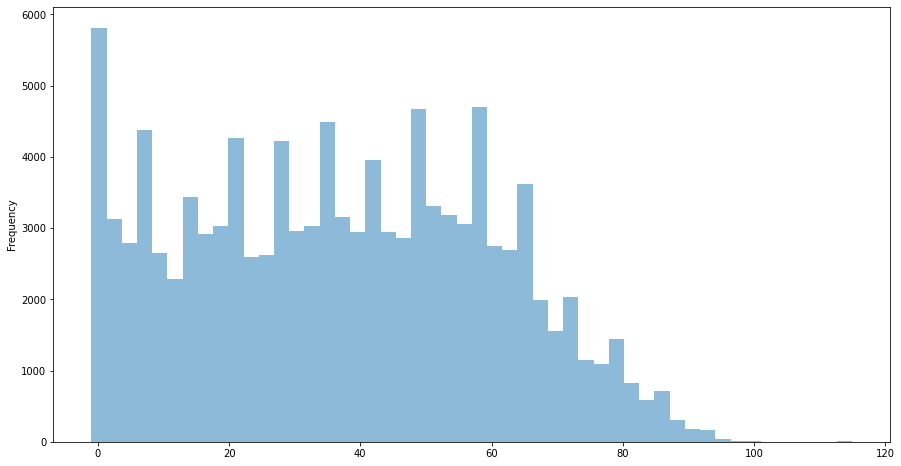

In [16]:
df.Age.plot(kind="hist",figsize=(15,8),bins=50,alpha=0.5);

In [17]:
print(sorted(df["Age"].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


**Negative Value in "Age" Column!**

### **Problems in the Dataset :**
##### 1- "PatientId" column is float
##### 2- "No-show" column may be misunderstood
##### 3- "Age" column has negative value
##### 4- "Handcap" should be true or false
##### 5- The time in Appointment Day is not important

### Data Cleaning

#### 1- Change Type of pitient id from float to int

In [18]:
# Change "PatientId" from float to int
df['PatientId'] = df['PatientId'].astype(int) 

#### 2- Change name of "No-show" to "show" and change values

In [19]:
# Display unique values for "No-show" col
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
# Rename "No-show" to "show"
df.rename(columns={'No-show': 'Show'}, inplace=True)
df = df.replace({'Show': {'Yes': 0, 'No': 1}}) #reverse values

In [21]:
# Display unique values for "Show" col
df["Show"].unique()

array([1, 0])

Right !

#### 3- Remove negative values and zeros from Age columns

In [22]:
df = df[df['Age'] >= 0] # take only rows has age above or equal 0
sum(df['Age'] < 0)

0

#### 4- "Handcap" must be true or false

In [23]:
# count of every value in Handcap
df['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [24]:
df = df.replace({'Handcap': {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}})

In [25]:
df['Handcap'].value_counts()

0    108285
1      2241
Name: Handcap, dtype: int64

Right !

#### 5- The time in Appointment Day is not important

In [26]:
# clear time in Appointment Day
df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x: x[0:10])


In [27]:
df["AppointmentDay"].head()

0    2016-04-29
1    2016-04-29
2    2016-04-29
3    2016-04-29
4    2016-04-29
Name: AppointmentDay, dtype: object

#### 6- Split ScheduledDay to ScheduledDate and ScheduledTime

In [28]:
df["ScheduledDay"].head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

In [29]:
# Split 2 columns
df["ScheduledDate"] = df["ScheduledDay"].apply(lambda x: x[:10])
df["ScheduledTime"] = df["ScheduledDay"].apply(lambda x: x[11:-1])

In [30]:
# Drop the original column
df.drop(columns=["ScheduledDay"], inplace=True)

In [31]:
df.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


In [32]:
# save Dataset after cleaning
df.to_csv('df_edited.csv', index=False)

In [33]:
df_S = df.query("Show == 1")
df_N = df.query("Show == 0")
df_S.head()

,PatientId,AppointmentID,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,ScheduledDate,ScheduledTime
0,29872499824296,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,2016-04-29,18:38:08
1,558997776694438,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,2016-04-29,16:08:27
2,4262962299951,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,2016-04-29,16:19:04
3,867951213174,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,2016-04-29,17:29:31
4,8841186448183,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,2016-04-29,16:07:23


<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : What factors are important in order to predict if a patient will show up for their scheduled appointment?



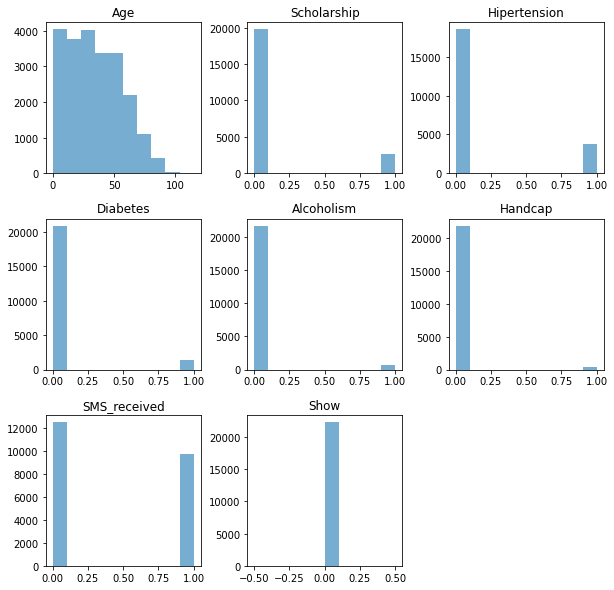

In [34]:
df_N.iloc[:,2:-2].hist(figsize=(10,10),grid=False,alpha=0.6);

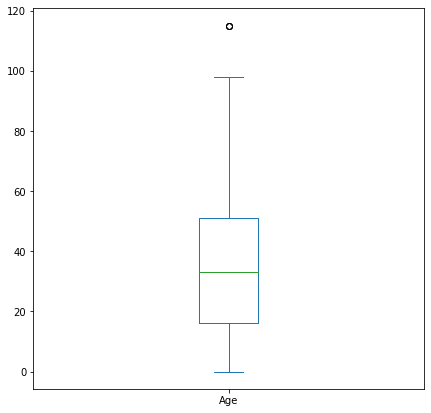

In [35]:
# plot Age to know its range
df_N["Age"].plot(kind="box",figsize=(7,7));

There is outliers !

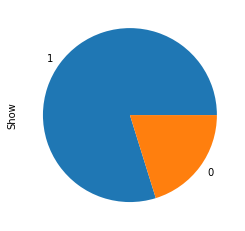

In [36]:
# Check outliers impact
df.query("Age < 100").Show.value_counts().plot(kind="pie");

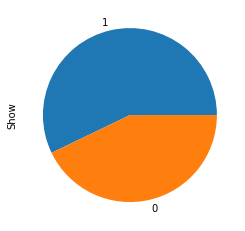

In [37]:
# Find outliers impact
df.query("Age > 100").Show.value_counts().plot(kind="pie");

<h4>Older people are less likely to show up for appointments, maybe because they're dead?</h4>

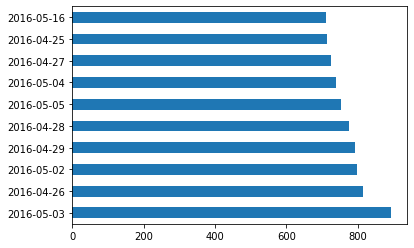

In [38]:
# plot top 10 dates that peaple not attend in it
df_N["ScheduledDate"].value_counts()[0:10].plot.barh();

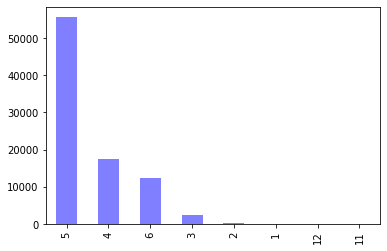

In [39]:
# extract month from ScheduledDate for attend persons
df_month_S = df_S["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))
df_month_S.value_counts().plot.bar(color="blue",alpha=0.5);

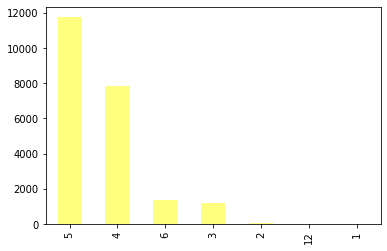

In [40]:
# extract month from ScheduledDate for abscent persons
df_month_N = df_N["ScheduledDate"].str.split("-").apply(lambda x: int(x[1]))
df_month_N.value_counts().plot.bar(color="yellow",alpha=0.5);

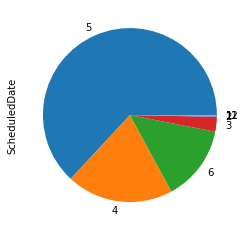

In [41]:
df_month_S.value_counts().plot.pie();

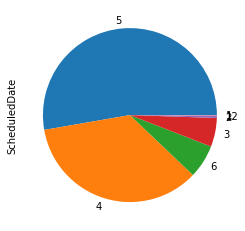

In [42]:
df_month_N.value_counts().plot.pie();

<h4>In month 4, people miss their appointments more than usual</h4>

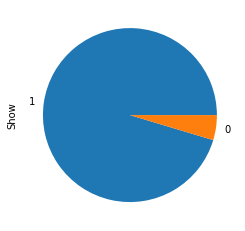

In [43]:
df_fastApp_e = df[df["ScheduledDate"] == df["AppointmentDay"]]
df_fastApp_e.Show.value_counts().plot(kind="pie");

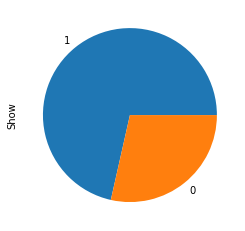

In [44]:
df_fastApp_n = df[df["ScheduledDate"] != df["AppointmentDay"]]
df_fastApp_n.Show.value_counts().plot(kind="pie");

<h4>Reserving the appointment on the same day has a good effect on attending the appointment</h4>

### Question 2 : What factors are important to know what make peaple make an appointment

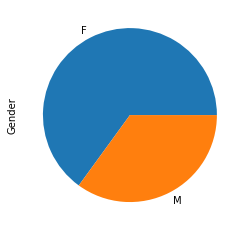

In [45]:
# See who is most attend
df['Gender'].value_counts().plot(kind="pie");

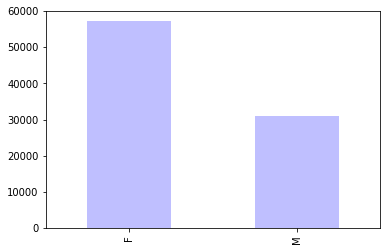

In [46]:
df_S['Gender'].value_counts().plot(kind="bar",color="blue",alpha=0.25);

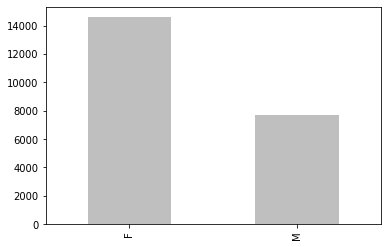

In [47]:
df_N['Gender'].value_counts().plot(kind="bar",color="black",alpha=0.25);

<h4>Females is more committed to medical appointments.</h4>

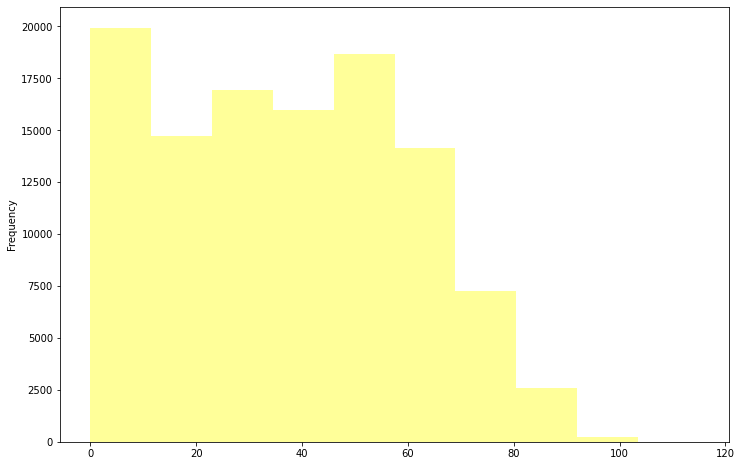

In [48]:
# plot Age histogram
df['Age'].plot(kind="hist",color="yellow",alpha=0.4,figsize=(12,8));

<h4>Young people are the most booked for appointments</h4>

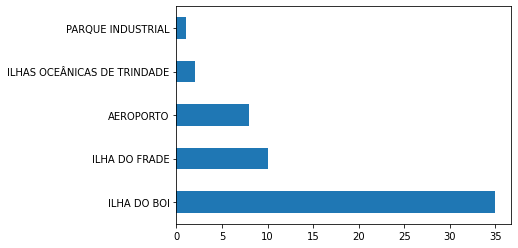

In [49]:
df.Neighbourhood.value_counts()[-5:].plot.barh();

In [50]:
print(f"The most 5 neighborhoods whose residents not book for appointment: \n")
for word in df.Neighbourhood.unique()[-5:] :
    print(f"{word}")

The most 5 neighborhoods whose residents not book for appointment: 

FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PARQUE INDUSTRIAL


<a id='conclusions'></a>
## Conclusions

### 1 - Older people are less likely to show up for appointments, maybe because they're dead? 

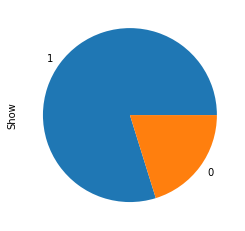

In [51]:
df.query("Age < 100").Show.value_counts().plot(kind="pie");

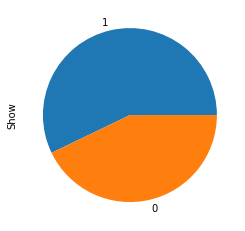

In [52]:
df.query("Age > 100").Show.value_counts().plot(kind="pie");

### 2 - people miss their appointments more than usual in April

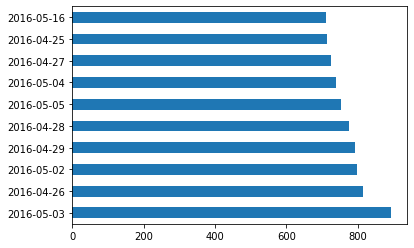

In [53]:
df_N["ScheduledDate"].value_counts()[0:10].plot.barh();

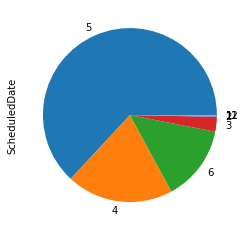

In [54]:
df_month_S.value_counts().plot.pie();

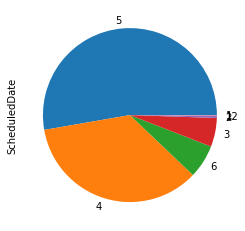

In [55]:
df_month_N.value_counts().plot.pie();

### 3 - Reserving the appointment on the same day has a good effect on attending the appointment

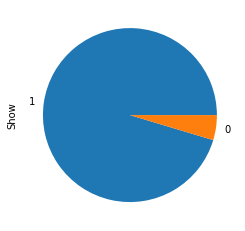

In [56]:
df_fastApp_e.Show.value_counts().plot(kind="pie");

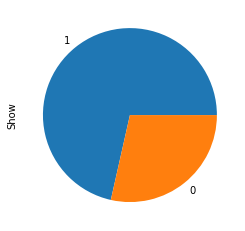

In [57]:
df_fastApp_n.Show.value_counts().plot(kind="pie");

### 4 - Females is more committed to medical appointments

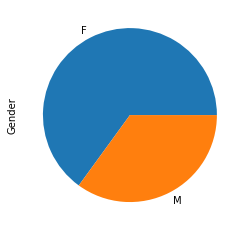

In [58]:
df['Gender'].value_counts().plot(kind="pie");

### 5- Young people are the most booked for appointments

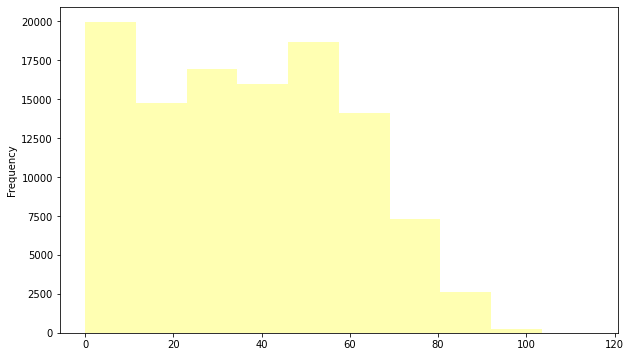

In [59]:
df['Age'].plot(kind="hist",color="yellow",alpha=0.3,figsize=(10,6));

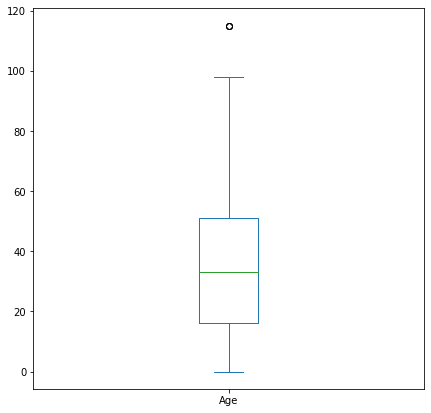

In [60]:
df_N["Age"].plot(kind="box",figsize=(7,7));

In [61]:
print(f"6- The most 5 neighborhoods whose residents not book for appointment: \n")
for word in df.Neighbourhood.unique()[-5:] :
    print(f"{word}")

6- The most 5 neighborhoods whose residents not book for appointment: 

FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PARQUE INDUSTRIAL


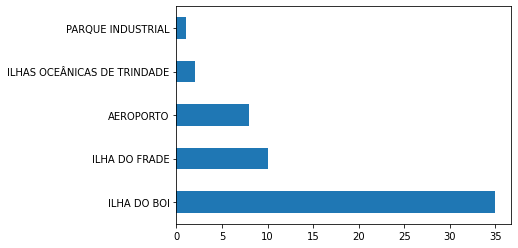

In [62]:
df.Neighbourhood.value_counts()[-5:].plot.barh();